In [319]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [320]:
# load in the dataset into a pandas
df = pd.read_csv('201902-fordgobike-tripdata.csv',encoding='ISO-8859-1')

In [321]:
# Show the first five rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

We have 3 types of values in dataset
 - Float
 - Object
 - Integer

#### Main features of interest ?
Duration_sec <br/>
member_birth_year<br/>
member_gender <br/>
Date <br/>
Start and End Station<br/>

#### Which Data will help support your investigation into your features of interest?

Duration<br/>
Station name<br/>
member age<br/>
Days (Time Duration)<br/>
Age Group<br/>

In [323]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [324]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are few missing values we can fill 0 in place of all missing values

In [325]:
for missColValues in ["end_station_id", "start_station_id", "start_station_name", "end_station_name", "member_birth_year"]:
    df[missColValues] = df[missColValues].fillna(df[missColValues].mode()[0])

In [326]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [327]:
df[df.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


Check if there any duplicate

In [328]:
# Get members age by member_birth_year from the current year 
df['member_age'] = 2022 - df['member_birth_year']

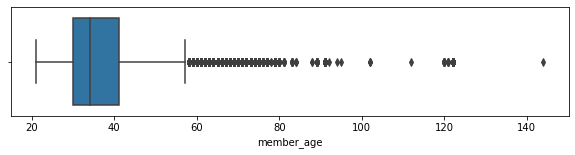

In [331]:
plt.figure(figsize = [10, 2])
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x='member_age', color=base_color);

More than 60 age people are so less we can remove than

In [332]:
# Only members under 60 years of age
df = df.query('member_age <= 60')

In [333]:
# Convert member_age to integer format
df.member_age = df.member_age.astype(int)

In [334]:
# Convert member_birth_year to integer format
df.member_birth_year = df.member_birth_year.astype(int)

In [339]:
# Changing the format to datetime of start time
df.start_time = pd.to_datetime(df.start_time)

In [340]:
# Changing the format to datetime of end time
df.end_time = pd.to_datetime(df.end_time)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177630 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             177630 non-null  int64         
 1   start_time               177630 non-null  datetime64[ns]
 2   end_time                 177630 non-null  datetime64[ns]
 3   start_station_id         177630 non-null  float64       
 4   start_station_name       177630 non-null  object        
 5   start_station_latitude   177630 non-null  float64       
 6   start_station_longitude  177630 non-null  float64       
 7   end_station_id           177630 non-null  float64       
 8   end_station_name         177630 non-null  object        
 9   end_station_latitude     177630 non-null  float64       
 10  end_station_longitude    177630 non-null  float64       
 11  bike_id                  177630 non-null  int64         
 12  user_type       

In [342]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,38
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1988,NaN,No,34
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,48


In [344]:
df.member_age.mean()

36.081574058436075

Average age is 36 years old

In [345]:
df.member_age.describe(percentiles = [.99])
# So it looks like 99% of users are under the age of 66

count    177630.000000
mean         36.081574
std           8.329252
min          21.000000
50%          34.000000
99%          59.000000
max          60.000000
Name: member_age, dtype: float64

Find particular month week as we have only data for 2nd month

In [347]:
df['start_time_week']= df['start_time'].dt.strftime('%a')
df['end_time_week']= df['end_time'].dt.strftime('%a')

In [348]:
df.head(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,end_time_in_month,start_time_week,end_time_week,month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,38,3,Thu,Fri,March
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,1988,NaN,No,34,3,Thu,Fri,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,50,3,Thu,Fri,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,33,3,Thu,Fri,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,48,3,Thu,Fri,March
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,39,3,Thu,Fri,March
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,33,3,Thu,Fri,March
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,34,3,Thu,Fri,March
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992,Male,No,30,3,Thu,Fri,March
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,5318,Subscriber,1996,Female,Yes,26,3,Thu,Fri,March


#### Univariate Exploration
Using this you can look at the relationships between variables.

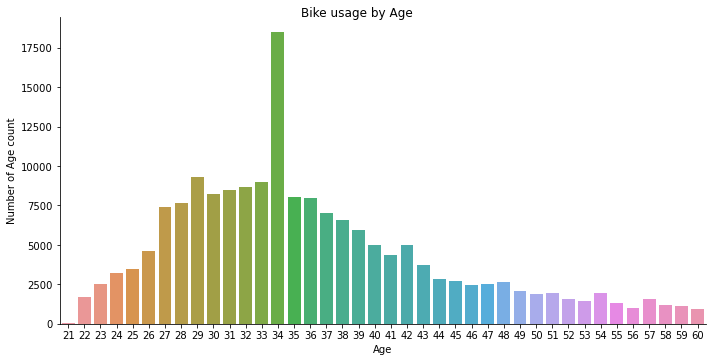

In [349]:
# Menbers age usage by bike
plot = sb.catplot(data = df, x = 'member_age', kind = 'count',  aspect = 2);
plot.set_axis_labels('Age', 'Number of Age count'),
plot.fig.suptitle('Bike usage by Age', y = 1, fontsize = 12);

In [350]:
# Start and end time hour
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour

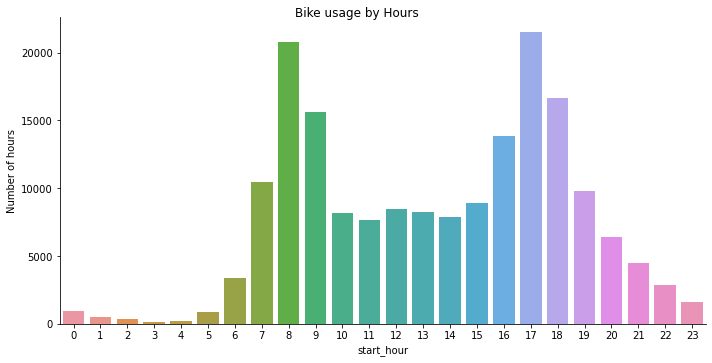

In [273]:
# Monthly usage of bikes
plot = sb.catplot(data = df, x = 'start_hour', kind = 'count',  aspect = 2);
plot.set_axis_labels('start_hour', 'Number of hours'),
plot.fig.suptitle('Bike usage by Hours', y = 1, fontsize = 12);

Mostly 8-9 in morning and 17-18 in evening time is on high may be because most work days start and end that time

In [351]:
df.bike_share_for_all_trip.replace({'Yes':True, 'No':False}, inplace=True)

bike_share_for_all_trip should be in boolean

In [352]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,end_time_in_month,start_time_week,end_time_week,month,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,False,38,3,Thu,Fri,March,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,1988,NaN,False,34,3,Thu,Fri,March,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,False,50,3,Thu,Fri,March,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,False,33,3,Thu,Fri,March,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,True,48,3,Thu,Fri,March,23,0


In [354]:
# Convert start_station_id to integer format
df['start_station_id']=df['start_station_id'].astype('int')

In [355]:
# Convert end_station_id to integer format
df['end_station_id']=df['end_station_id'].astype('int')

Show count of customer distribution 

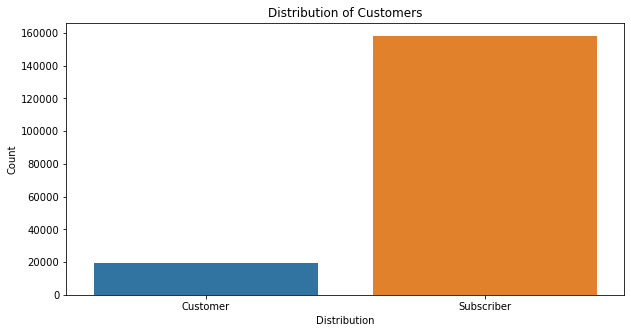

In [356]:
plt.figure(figsize = (10,5))
plot = sns.countplot(data=df, x='user_type')
plt.xlabel('Distribution')
plt.ylabel('Count')
plt.title("Distribution of Customers")
plt.show()

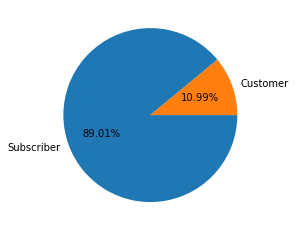

In [357]:
# plot a pie chart
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,
        counterclock = False, autopct='%1.2f%%');

majority of the users are subscribers and the lower are Customers 

Show number of bike trips done by members

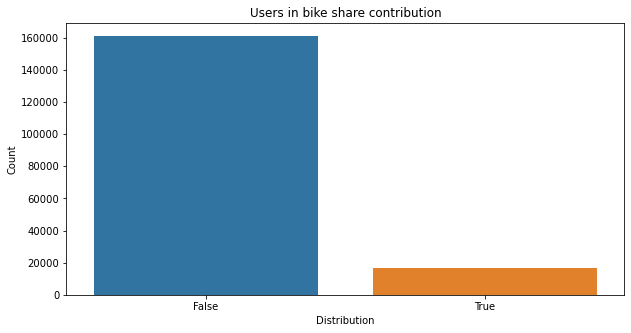

In [358]:
plt.figure(figsize = (10,5))
plot = sns.countplot(data=df, x='bike_share_for_all_trip')
plt.xlabel('Distribution')
plt.ylabel('Count')
plt.title("Users in bike share contribution")
plt.show()

majority of the users are not a part of the Trips Program

Show number of male and female distribution 

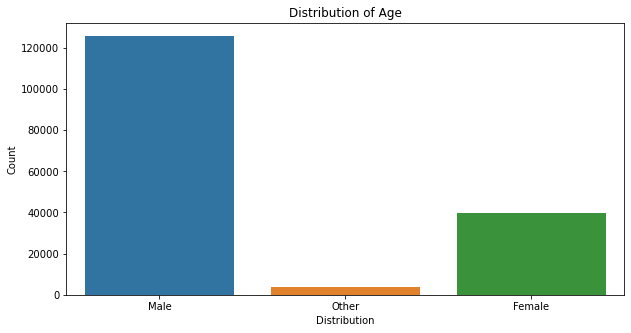

In [360]:
plt.figure(figsize = (10,5))
plot = sns.countplot(data=df, x='member_gender')
plt.xlabel('Distribution')
plt.ylabel('Count')
plt.title("Distribution of Age")
plt.show()

Male users are almost tripled than female users.

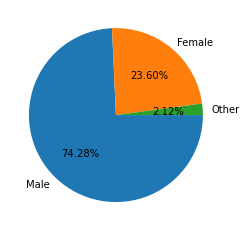

In [361]:
# plot a pie chart
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,
        counterclock = False, autopct='%1.2f%%');

Most users are subscribers, not Customers and Males as shown in the charts above.

Show top 15 start station name

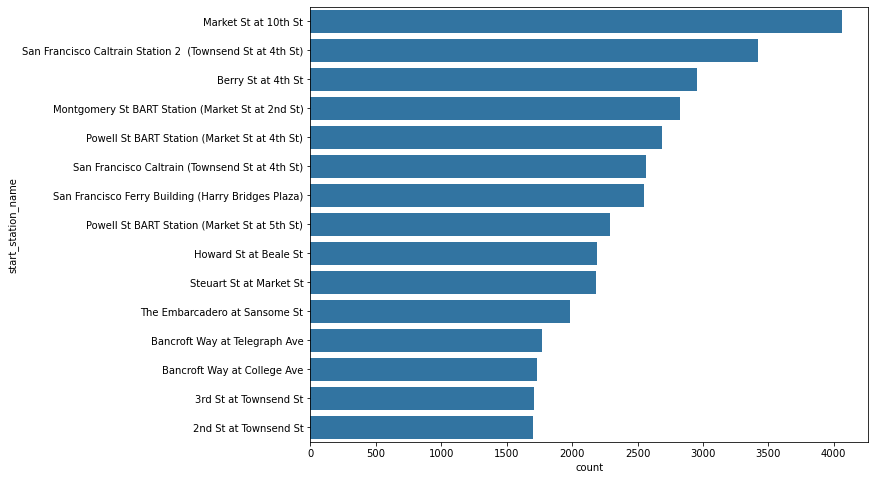

In [362]:
# plot a horizontal bar chart
cat_order = df['start_station_name'].value_counts().index[:15]
plt.figure(figsize=[10,8])
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = cat_order);

Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St) were the most common start stations.

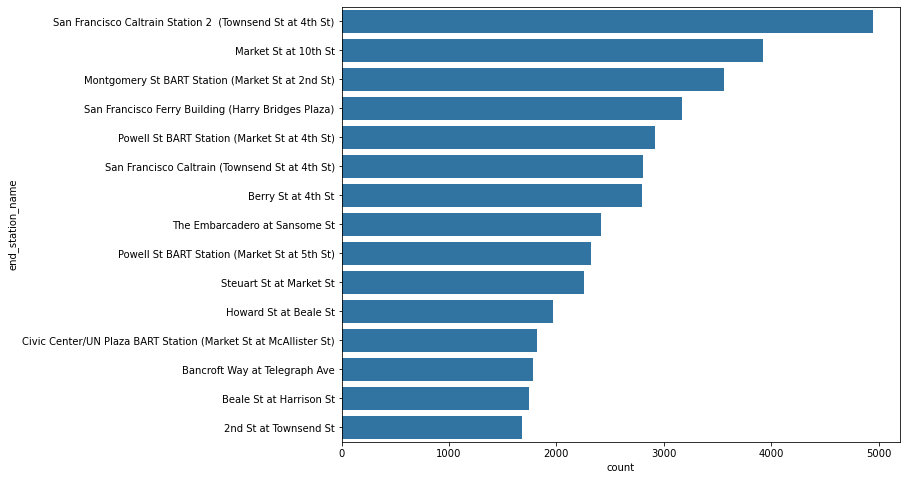

In [364]:
# plot a horizontal bar chart
cat_order = df['end_station_name'].value_counts().index[:15]
plt.figure(figsize=[10,8])
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = cat_order);

Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St) were the most common end stations.

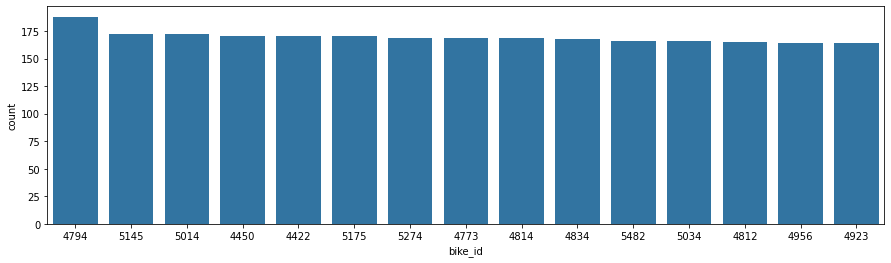

In [284]:
# plot a bar chart
cat_order = df['bike_id'].value_counts().index[:15]
plt.figure(figsize=[15,4])
sb.countplot(data = df, x = 'bike_id', color = base_color, order = cat_order);

maximum number of uses for a single bike was around 180.

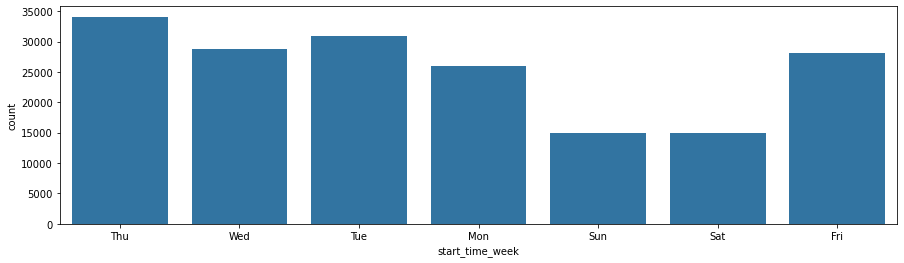

In [365]:
plt.figure(figsize=[15,4])
sb.countplot(data = df, x = 'start_time_week', color = base_color);

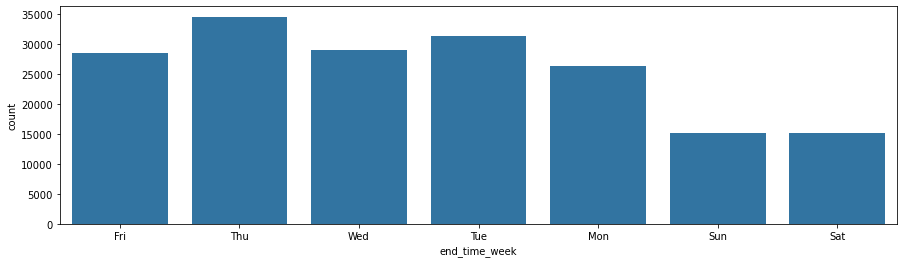

In [286]:
plt.figure(figsize=[15,4])
sb.countplot(data = df, x = 'end_time_week', color = base_color);


maximum number of uses for a single bike was around 180<br/>
majority of the users are not a part of the Trips Program <br/>
San Francisco Caltrain Station 2 - Townsend St at 4th St and San Francisco Caltrain - Townsend St at 4th St were the most common end stations.

### Bivariate

Number of trips taken by different user types across a hour of the day

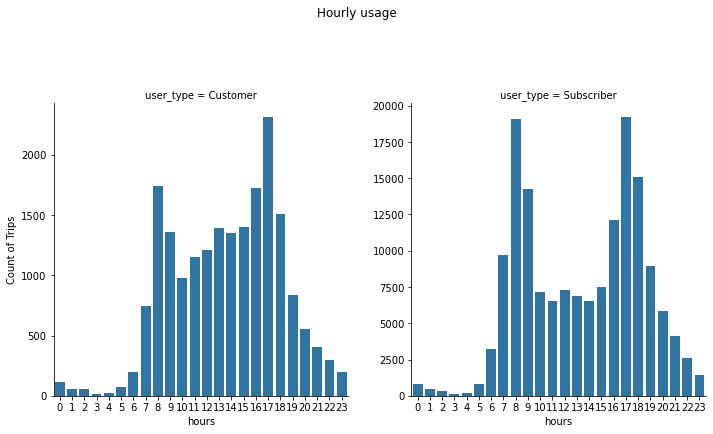

In [287]:
plot = sb.catplot(data=df, x='start_hour', col="user_type", kind='count', sharey = False, color = base_color)
plot.set_axis_labels("hours", "Count of Trips")
plot.fig.suptitle('Hourly usage', y=1.20, fontsize=12);

Customers and Subscribers are using bikes more at morning 8 and evening 17 even counts are different

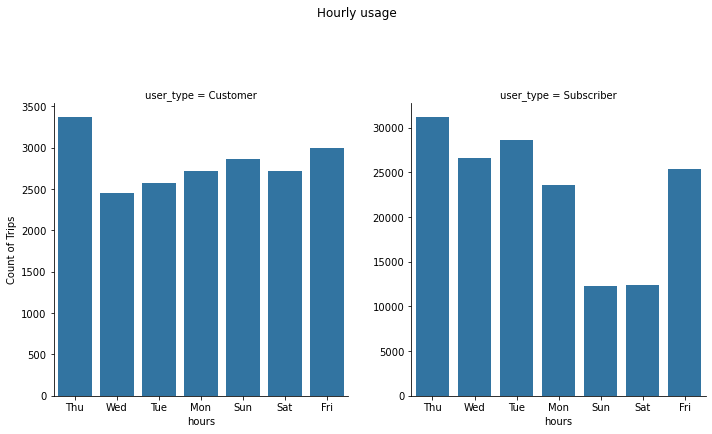

In [288]:
# Analysis of the number of trips taken by different user types across a hour of the day
plot = sb.catplot(data=df, x='start_time_week', col="user_type", kind='count', sharey = False, color = base_color)
plot.set_axis_labels("hours", "Count of Trips")
plot.fig.suptitle('Hourly usage', y=1.20, fontsize=12);

*****Subscribers members mostly used bikes on workdays and customers bikes usage was almost the whole week with a slight increment on Thuseday and Friday.

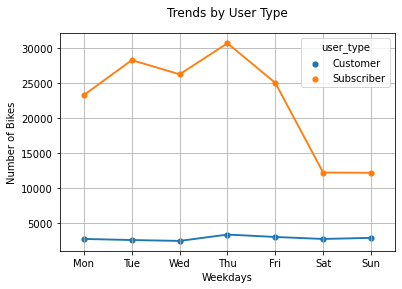

In [366]:
df_week = df.groupby(['start_time_week', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=df_week, x='start_time_week', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Trends by User Type', y=1.05, fontsize=12)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bikes');
plt.grid()

Subscribires are more in weekdays always compared with weekends

In [368]:
# Change the duration_sec to duration_min
df['duration_min'] = df['duration_sec'] / 60

In [371]:
df['duration_min'].describe()

count    177630.000000
mean         12.099332
std          30.300226
min           1.016667
25%           5.416667
50%           8.550000
75%          13.216667
max        1424.066667
Name: duration_min, dtype: float64

### Multivariate

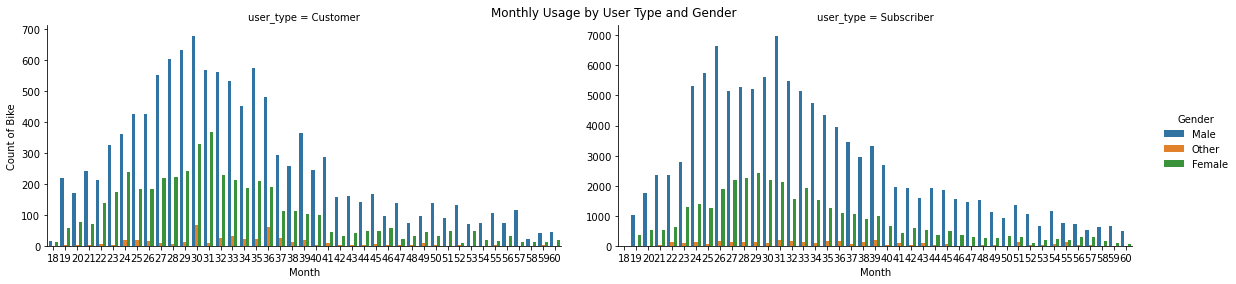

In [303]:
# Monthly usage - user type and gender
Plot = sb.catplot(data=df, x='member_age', col="user_type", hue="member_gender", kind='count', sharey = False, height=4, aspect=2);

Plot.set_axis_labels("Month", "Count of Bike")
Plot._legend.set_title('Gender')

Plot.fig.suptitle('Monthly Usage by User Type and Gender');


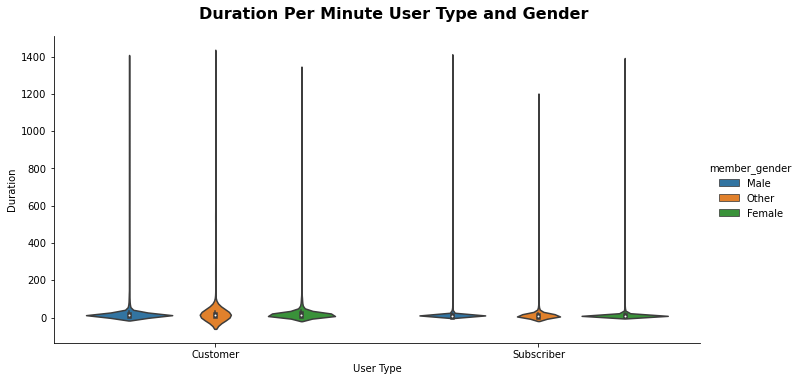

In [309]:
plot = sb.catplot(data=df, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);
plot.set_axis_labels("User Type", "Duration")
plot.fig.suptitle('Duration Per Minute User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

Find trend between member and age by user type

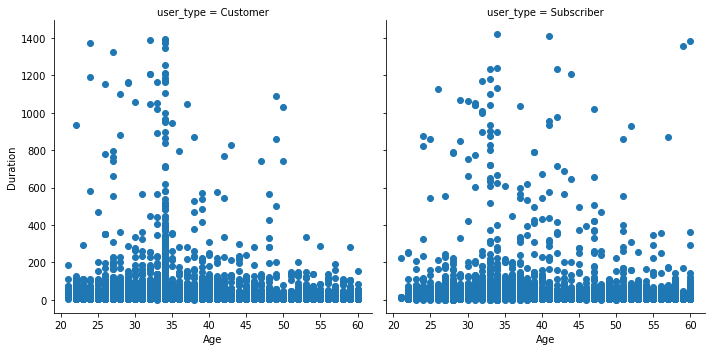

In [373]:
plot = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, height = 5)
plot.map(plt.scatter, 'member_age', 'duration_min')

plot.set_xlabels('Age')
plot.set_ylabels('Duration')

plt.show()

In [375]:
df.to_csv('201902-fordgobike-tripdata_clean.csv', index = False)